# Análise de dados

## Introdução
Neste arquivo iremos fazer a análise dos dados do banco output.db. Para isso, vamos utilizar o módulo
matplotlib para fazer a visualização dos dados.

## Análise

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from data_manager import API
from data_parser import Parser

%matplotlib inline

In [2]:
# Mudando o caminho para o DB

API.db_path('../resources/DB/output.db')

'../resources/DB/output.db'

In [3]:
total_findings = API.get_row_count('findings')
severities = API.severities()
auditors = API.get_auditors()
print(severities)

['Low', 'Medium', 'High', 'Informational', 'Undetermined']


In [4]:
severities_count = {'severity': [], 'quantity': []}
script = "SELECT COUNT(*) FROM findings WHERE severity = ?"
for severity in severities:
    severities_count['severity'].append(severity)
    quantity = API.execute(script, [severity])[0][0]
    severities_count['quantity'].append(quantity)

### Severidades.

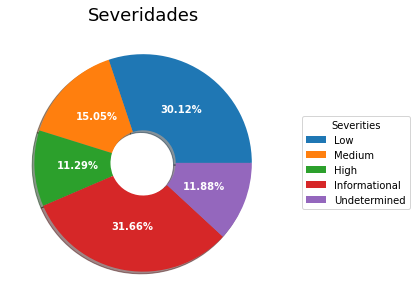

In [5]:
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect='equal'))
wedges, texts, autotexts = ax.pie(severities_count['quantity'],
                           shadow=True,
                           wedgeprops=dict(width=0.7),
                           autopct='%.2f%%',
                           textprops=dict(color='w'))
plt.setp(autotexts, size=10, weight='bold')
ax.set_title('Severidades', size=18)
ax.legend(wedges, severities,
          title='Severities',
          loc='right',
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [34]:
auditors_vs_severity = {'auditor': [],
                            'severity': {
                                'Low': [],
                                'Medium': [],
                                'High': [],
                                'Informational': [],
                                'Undetermined': []
                                }
                        }
for auditor in auditors:
    auditors_vs_severity['auditor'].append(auditor['name'])
    for severity in auditors_vs_severity['severity']:
        script = f"SELECT COUNT(*) FROM findings WHERE severity = '{severity}' AND auditor_id = ?"
        quantity = API.execute(script, [auditor['id']])[0][0]
        auditors_vs_severity['severity'][severity].append(quantity)

low_mean = np.array(auditors_vs_severity['severity']['Low']).mean()
medium_mean = np.array(auditors_vs_severity['severity']['Medium']).mean()
high_mean = np.array(auditors_vs_severity['severity']['High']).mean()
informational_mean = np.array(auditors_vs_severity['severity']['Informational']).mean()
undetermined_mean = np.array(auditors_vs_severity['severity']['Undetermined']).mean()

print(f"""
Low Severity Mean: {low_mean:.3f}
Medium Severity Mean: {medium_mean:.3f}
High Severity Mean: {high_mean:.3f}
Informational Severity Mean: {informational_mean:.3f}
Undetermined Severity Mean: {undetermined_mean:.3f}
""")


Low Severity Mean: 133.792
Medium Severity Mean: 66.875
High Severity Mean: 50.167
Informational Severity Mean: 140.625
Undetermined Severity Mean: 52.750



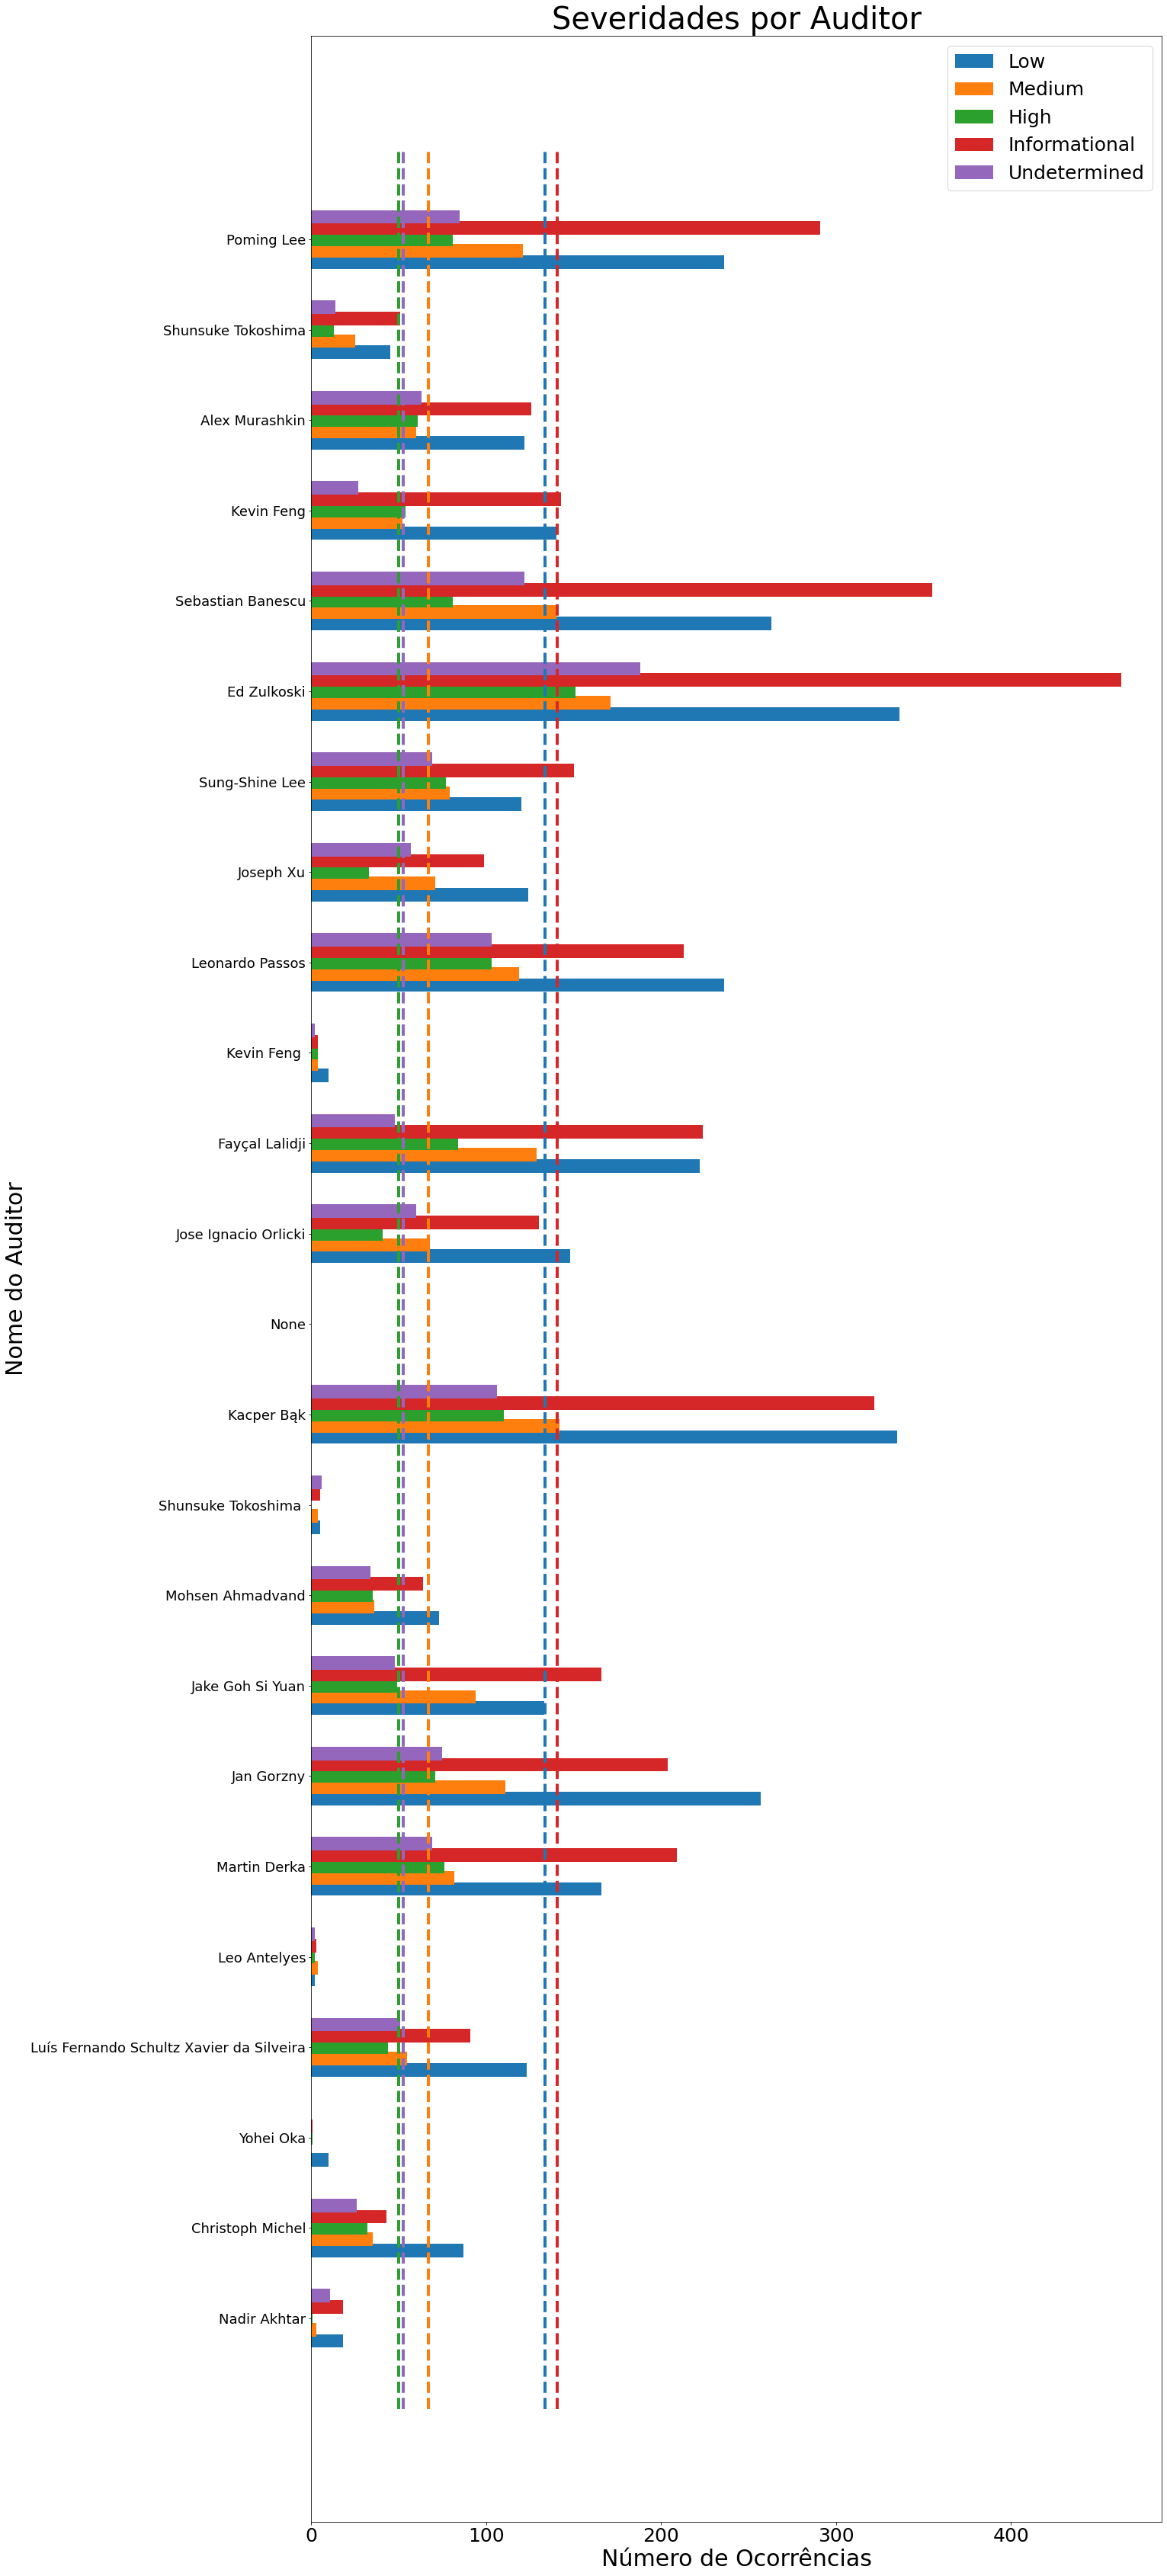

In [56]:
width = 0.15
x = np.arange(len(auditors_vs_severity['auditor']))

plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=30)

fig, ax = plt.subplots(figsize=(20, 60))

ax.barh(x - width * 2 / 1.2, auditors_vs_severity['severity']['Low'], width, label='Low')
ax.barh(x - width / 1.2, auditors_vs_severity['severity']['Medium'], width, label='Medium')
ax.barh(x, auditors_vs_severity['severity']['High'], width, label='High')
ax.barh(x + width / 1.2, auditors_vs_severity['severity']['Informational'], width, label='Informational')
ax.barh(x + width * 2 / 1.2, auditors_vs_severity['severity']['Undetermined'], width, label='Undetermined')

ax.set_title('Severidades por Auditor', size=40)
ax.set_xlabel('Número de Ocorrências')
ax.set_ylabel('Nome do Auditor')
ax.set_yticks(x)
ax.set_yticklabels(auditors_vs_severity['auditor'], ha='right')

ax.plot(np.ones(len(x) + 2) * low_mean, np.arange(0, len(x) + 2) - 1, linestyle='--', linewidth=4)
ax.plot(np.ones(len(x) + 2) * medium_mean, np.arange(0, len(x) + 2) - 1, linestyle='--', linewidth=4)
ax.plot(np.ones(len(x) + 2) * high_mean, np.arange(0, len(x) + 2) - 1, linestyle='--', linewidth=4)
ax.plot(np.ones(len(x) + 2) * informational_mean, np.arange(0, len(x) + 2) - 1, linestyle='--', linewidth=4)
ax.plot(np.ones(len(x) + 2) * undetermined_mean, np.arange(0, len(x) + 2) - 1, linestyle='--', linewidth=4)

ax.legend(fontsize=25)
plt.show()